# Jupyter Notebooks - Maths Demos

This configuration is preconfigured with several packages to support maths related demos.

As well as typsetting mathematical equations, several packages exist that support the creation of print quality mathematical diagrams.

This notebooks includes hidden code cells. To display a hidden code cell, select in and then click on the *Toggle selected cell input display* toolbar button, or toggle all the code cell inputs.

To render all the generated content, from the *Cell* menu, select *Run All*.

Some of the cells in this notebook have also been annotated with slideshow settings:

- to run the the slideshow, click the *Enter/Exit RISE slideshow* button from the notebook toolbar;
- exit the presentation viwe by clicking the *X* in the top left hand corner of the presentation view;
- to see the slideshow cell settings, select *View > Cell Toolbar > Slideshow*.  Reset the notebook view with *View > Cell Toolbar > None*.

## Rendering equations Using MathJax

Equations can be rendered as a block using MathJax in a markdown cell.

\begin{align}
\sqrt{3x-1}+(1+x^2)
\end{align}

See this third party [Typesetting Equations](https://nbviewer.jupyter.org/github/ipython/ipython/blob/4.0.x/examples/Notebook/Typesetting%20Equations.ipynb) demonstration notebook for further examples.

MathJax content can also be rendered inline. For example, we can include the expression  $\sqrt{3x-1}+(1+x^2)$ embedded *within* a line of text.

## Equation Numbering

Enabling the `equation_numbering` notebook extension will automatically number equations Mathjax.

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

A toolbar button allows equation numbering to be reflowed if an equation is added, moved or removed without the need to save and reload the notebook.

## Simple Plotting

In [1]:
#Import some required packages
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

In [2]:
#Define a variable
frequency=1

#Define a list of numbers
# in the range 0..1 with step size 0.2
timestamps=np.arange(0.0,1.0,0.02)

timestamps

array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
        0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,
        0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,  0.52,
        0.54,  0.56,  0.58,  0.6 ,  0.62,  0.64,  0.66,  0.68,  0.7 ,
        0.72,  0.74,  0.76,  0.78,  0.8 ,  0.82,  0.84,  0.86,  0.88,
        0.9 ,  0.92,  0.94,  0.96,  0.98])

As well as printing a chart, we can interrogate the chart object to start to produce a written description of it. 

A hidden code cell below contains the code for pulling out the textual description of the chart.

In [3]:
import re

#http://nbviewer.jupyter.org/gist/BenRussert/7fbd3f86baeda70f1d3f8bdf219b8627
def get_plot_info(p):
    """ in this example p are the Axes objects pd.DataFrame.plot() returns """
    txts = p.legend_.get_texts() if p.legend_ is not None else []
    plot_info = {
    "title" : p.get_title(),
    "legendlabels": [x.get_text() for x in txts],
    "x_label": re.sub(' label$', '',p.xaxis.get_label_text()),
    "x_ticks": [x.get_text() for x in p.xaxis.get_majorticklabels()],
    "y_label": re.sub(' label$', '',p.yaxis.get_label_text()),
    "y_ticks": [x.get_text() for x in p.yaxis.get_majorticklabels()]
    }
    
    desc = '''
This chart, titled "{title}", is labeled "{x_label}" on the x-axis and "{y_label}"
on the y-axis.'''.format(**plot_info)
    
    return desc, plot_info


This chart, titled "My Plot", is labeled "My x-axis" on the x-axis and "My y-axis"
on the y-axis.


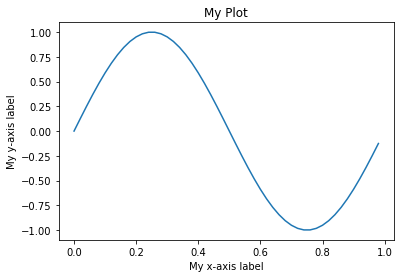

In [4]:
fig, ax = plt.subplots()
plt.plot(timestamps,np.sin(2*np.pi*timestamps*frequency))

#We can add a title to the plot
plt.title('My Plot')

#And label the axes
plt.xlabel('My x-axis label')
plt.ylabel('My y-axis label')

txt, info = get_plot_info(ax)
print(txt)

In [5]:
# Show the information returned about the chart axes
# This is a subset of the axes data; modify get_plot_info() to add more details
info

{'legendlabels': [],
 'title': 'My Plot',
 'x_label': 'My x-axis',
 'x_ticks': ['', '', '', '', '', '', '', ''],
 'y_label': 'My y-axis',
 'y_ticks': ['', '', '', '', '', '', '', '', '', '', '']}

### Add Interactive Widgets

It's a straightforward matter to decorate a function that can create an interactive chart where the controls are dynamically created based on the type of any arguments passed into the function.

In [6]:
from ipywidgets import interact

@interact(f=(0,10,1))
def pltsin(f):
    plt.plot(timestamps,np.sin(2*np.pi*timestamps*f))

A Jupyter Widget

## Drawing Mathematical Diagrams

Several packages exist that support the creation of print quality mathematically accurate scientific diagrams including:

- `asymptote`
- `TikZ`

### `asymptote`

The [`asympote` Linux package](http://asymptote.sourceforge.net/) *is a powerful descriptive vector graphics language that provides a natural coordinate-based framework for technical drawing. Labels and equations are typeset with LaTeX.*

*A major advantage of Asymptote over other graphics packages is that it is a programming language, as opposed to just a graphics program.*

In [7]:
drawingspec = '''
import math; import graph; import geometry;
size(12cm); xaxis("$x$"); yaxis("$y$");
real theta1={theta1}; real theta2={theta2};
real L1=0.45; real L2=0.48;
pair l1p = (L1*sin(theta1), L1*cos(theta1));
pair l2p = l1p + (L2*sin(theta1+theta2), L2*cos(theta1+theta2));
draw((0,0)--l1p--l2p); draw(l1p--l1p*1.5, dashed); dot(l2p); draw((0,0)--l2p, dashed); 
label("$J1(0,0)$", (0,0), NW); label("$J2(u,v)$", l1p, NW); label("$H(x,y)$", l2p, NE);
draw("$L1$",(0,0)-0.02*I*l1p--l1p-0.02*I*l1p, red, Arrows, Bars, PenMargins);
draw("$L2$", l1p-0.02*I*l2p--l2p-0.02*I*l2p, red, Arrows, Bars, PenMargins);
draw("$\\theta_1$", arc((0,1),(0,0),l1p,0.1), blue, PenMargins);
draw("$\\theta_2$", arc(l1p,0.1,degrees(l1p),degrees(l2p-l1p),CW), blue, PenMargins);
draw("$\\alpha$", arc((1,0),(0,0),l2p,0.2), blue, PenMargins);
'''

In [8]:
import subprocess # to run asymptote
import shlex

The following code cell has a hidden input. Select the cell and click on the *Toggle selected cell input display* toolbar button to reveal the code.

You can dynamically change the diagram by entering new parameter values into the text boxes.

In [10]:
@interact(theta1='-pi/2',   theta2='pi/3')
def asym_demo(theta1,theta2):
    f=open('/tmp/pa10-firstjoint.asy', 'w')
    f.write(drawingspec.format(theta1=theta1,theta2=theta2)); f.close()
    subprocess.call(shlex.split('asy /tmp/pa10-firstjoint.asy -f png -o pa10-firstjoint.png'))
    return Image('pa10-firstjoint.png')

A Jupyter Widget

### `TikZ`

The `TikZ` Linux package is a *TeX* package for creating graphics programmatically ([about](https://www.tug.org/TUGboat/tb29-1/tb91walczak.pdf)).

It provides a front-end layer for the [PGFPlots](http://pgfplots.sourceforge.net/) LaTeX chart plotting package ([gallery](http://pgfplots.sourceforge.net/gallery.html)).

See the [`Tikz.ipynb`](Tikz.ipynb) notebook for examples.

## Symbolic Maths

Supprt for *symbolic maths* means ...

Support for symbolic mathematics is available via the Python `sympy` package.

??Jupyter notebooks can also work directly with Mathematica kernel; is there also the free equivalent kernel?

In [16]:
#Import sympy packages
import math
from sympy import *
from sympy import init_printing
init_printing()

b,c,B,C=symbols(['b','c','B','C'])

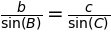

In [17]:
#A simple example of the sine rule
exp=Eq(b/sin(B),c/sin(C))
exp

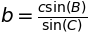

In [18]:
#We can solve for b:
distance_b = solve(exp)[0][b]
Eq(b, distance_b)

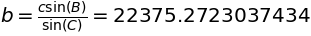

In [19]:
#Then we can substitute in values
Eq(Eq(b,distance_b), distance_b.subs({c:27404,B:math.radians(45),C:math.radians(60)}))